<h1 align="center">Model Training </h1>

<img src="data/prescription-drug.jpg" />

## RECAP

Till now we have done with EDA and have figured out which all are useful features for predicting physician_segment.
Even we have created final dataset with all important feture which was discovered in the process of exploratory data analysis.

For checking EDA, you can go back check <a href="EDA.ipynb" alt="EDA python file">EDA python file</a>

##  TASK
* Train multiple models
* Extract Important features using PCA and Autoencoder
* plot loss of each models so that we can able to figure out which model is best model
* Perform Evaluation on test and check how good model on on seen data.

## APPROACH


**SET 1 Dataset : All features**
- 4.1 Random Model
- 4.2 KNN 
- 4.3 Logistic Regression
- 4.4 SVM
- 4.5 Random Forest
- 4.6 LGBM
- Comparison of the metrics for each model/algorithm


**SET 2 Dataset : Top 25 Important Features + 10 Autoencoder components**


- 6.1 LGBMClassifier
- 6.2 Random Forest Classifier
- Comparison of the metrics for each model/algorithm



**FINAL SUMMARY**
- Comparison of the metrics for each model/algorithm
- Train Best model and save it for future use

## Required Libraries

In [137]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

from sklearn.preprocessing import normalize,StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import joblib
import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import auc,roc_curve,roc_auc_score,accuracy_score
from sklearn.metrics import classification_report,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.metrics import classification_report,confusion_matrix


from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
warnings.filterwarnings("ignore")

## 1. Choosing the metric for Multi-Class Classification Model

As we already know that this is the multi class classification so multi-class log loss will be good metrics for this problem. We need to predict to which class the physician belongs to. Log Loss is a good measure as it penalizes it also higher probabilities if the prediction is wrong

<img src="data/multi_log_loss.png"/>

## 2. Load dataset and splitting Data using Stratified sampling

We split the data into three part train,validation(cv), and test datasets using straitified sapling method so that the distributions are same across all the 3 datasets

In [138]:
base_dir=os.path.abspath(os.path.curdir+"/data")
data_file=os.path.join(base_dir,"all_data.csv")

In [139]:
data=pd.read_csv(data_file)
print("shape of data::",data.shape)
data.head()

shape of data:: (48894, 35)


,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,quarter,year,physician_segment_ordinal
0,1,2019-Q3,1,9,39,0,0,1,0,0,...,High,0.91,0.89,M,58,83,nephrology,Q3,2019,2
1,1,2019-Q4,1,4,12,0,0,0,0,0,...,High,0.91,0.89,M,58,83,nephrology,Q4,2019,2
2,1,2020-Q1,1,14,26,0,0,1,0,0,...,High,0.91,0.89,M,58,83,nephrology,Q1,2020,2
3,1,2020-Q2,1,18,20,0,0,1,0,0,...,High,0.91,0.89,M,58,83,nephrology,Q2,2020,2
4,1,2020-Q3,1,5,96,0,0,0,0,0,...,Medium,0.91,0.89,M,58,83,nephrology,Q3,2020,1


In [140]:
np.random.randint(0,2)

1

In [141]:
data.iloc[:,15:].describe()

,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_tenure,physician_age,year,physician_segment_ordinal
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,131.178570,51.967583,3.453184,3.161963,0.404180,0.615781,0.949912,0.999448,449.401767,72.718820,0.919870,0.643585,28.132143,60.152779,2019.600442,1.928539
std,163.679752,117.114609,10.504276,16.473768,1.008407,2.760929,0.218129,0.023493,413.255710,102.687971,0.168365,0.321759,13.290559,14.004527,0.489813,0.960219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,3.000000,28.000000,2019.000000,0.000000
25%,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,181.000000,15.000000,0.920000,0.350000,18.000000,51.000000,2019.000000,1.000000
50%,78.000000,7.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,343.000000,41.000000,1.000000,0.840000,29.000000,61.000000,2020.000000,2.000000
75%,177.000000,45.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,585.000000,92.000000,1.000000,0.920000,38.000000,70.000000,2020.000000,3.000000
max,4746.000000,2538.000000,572.000000,819.000000,48.000000,140.000000,1.000000,1.000000,8815.000000,3790.000000,1.000000,1.000000,68.000000,94.000000,2020.000000,3.000000


In [142]:
data.drop(columns=["physician_segment","physician_id"],inplace=True)

In [143]:
if not os.path.isfile(os.path.join(base_dir,"final_all_data.csv")):
    data.to_csv(os.path.join(base_dir,"final_all_data.csv"),index_label=False)
else:
    data=pd.read_csv(os.path.join(base_dir,"final_all_data.csv"))

In [144]:
print("shape of data::",data.shape)
data.head()

shape of data:: (48894, 33)


,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,quarter,year,physician_segment_ordinal
0,2019-Q3,1,9,39,0,0,1,0,0,1,...,42,0.91,0.89,M,58,83,nephrology,Q3,2019,2
1,2019-Q4,1,4,12,0,0,0,0,0,1,...,45,0.91,0.89,M,58,83,nephrology,Q4,2019,2
2,2020-Q1,1,14,26,0,0,1,0,0,1,...,49,0.91,0.89,M,58,83,nephrology,Q1,2020,2
3,2020-Q2,1,18,20,0,0,1,0,0,1,...,46,0.91,0.89,M,58,83,nephrology,Q2,2020,2
4,2020-Q3,1,5,96,0,0,0,0,0,1,...,0,0.91,0.89,M,58,83,nephrology,Q3,2020,1


In [145]:
target_colmn="physician_segment_ordinal"

In [146]:
X=data.drop(columns=[target_colmn])

y=data[target_colmn]

In [147]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.20, random_state=13,stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=13,stratify=y_train)

In [148]:
# SUMMARY TABLE COLUMNS
table_columns=["Feature_set","Model","Evaluation_matrix","train_loss","CV_loss","Test_loss","Mis-classified"]
summary=[]

## 3. SET 1: Preparing data to feed the models

In [149]:
# Categorical and Numerical column list
categorical_columns=["physician_gender","physician_in_group_practice","physician_hospital_affiliation"
                          ,"physician_speciality","brand_prescribed","year_quarter","quarter","year"]
numerical_columns=[col for col in X.columns.values if col not in categorical_columns]
# numerical_columns.remove("physician_segment_ordinal")

In [150]:
# Reference : Applied AI Course:

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
#     print(C)
    labels = [0,1,2,3]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix", "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix"    , "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [151]:
# https://stackoverflow.com/questions/44601533/how-to-use-onehotencoder-for-multiple-columns-and-automatically-drop-first-dummy
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class My_encoder(BaseEstimator, TransformerMixin):
   
    def __init__(self,drop = 'first',sparse=False):
        self.encoder = OneHotEncoder(drop = drop,sparse = sparse)
        self.features_to_encode = []
        self.columns = []
    
    def fit(self,X_train,features_to_encode):
        
        data = X_train.copy()
        self.features_to_encode = features_to_encode
        data_to_encode = data[self.features_to_encode]
        self.columns = pd.get_dummies(data_to_encode,drop_first = True).columns
        self.encoder.fit(data_to_encode)
        return self.encoder
    
    def transform(self,X_test):
        
        data = X_test.copy()
        data.reset_index(drop = True,inplace =True)
        data_to_encode = data[self.features_to_encode]
        data_left = data.drop(self.features_to_encode,axis = 1)
        
        data_encoded = pd.DataFrame(self.encoder.transform(data_to_encode),columns = self.columns)
        
        return pd.concat([data_left,data_encoded],axis = 1)


### 3.1 One Hot encoding on categorical variable

In [152]:
# Convert Categorical varible using one hot encoding and droped fisrt because
# It will create collinearity
cat_encod=My_encoder()
cat_encod.fit(X_train,categorical_columns)
X_train_cat=cat_encod.transform(X_train[categorical_columns])
X_cv_cat=cat_encod.transform(X_cv[categorical_columns])
X_test_cat=cat_encod.transform(X_test[categorical_columns])

OneHotEncoder(drop='first', sparse=False)

In [153]:
cat_cols=cat_encod.columns.values

In [154]:
# from sklearn.compose import ColumnTransformer

In [155]:
# ct2 = ColumnTransformer([('one-hot-encoder', OneHotEncoder(drop='first'), categorical_columns)], remainder='passthrough')
# ct2.fit(X_train[categorical_columns])
# X_train_cat=ct2.transform(X_train[categorical_columns])
# X_cv_cat=ct2.transform(X_cv[categorical_columns])
# X_test_cat=ct2.transform(X_test[categorical_columns])

In [159]:
# save the model to disk
import pickle
filename = base_dir+'/ohe_dump.pkl'

if not os.path.isfile(filename):
    joblib.dump(cat_encod, filename)
else:
    cat_encod=joblib.load(filename)

### 3.2 Normalize Numerical varible using MinMaxScaler

In [160]:
scaler=MinMaxScaler()
X_train_num=scaler.fit_transform(X_train[numerical_columns])
X_cv_num=scaler.transform(X_cv[numerical_columns])
X_test_num=scaler.transform(X_test[numerical_columns])

In [162]:
# save the model to disk
import pickle
filename = base_dir+'/scaler_dump.pkl'

if not os.path.isfile(filename):
    joblib.dump(scaler, filename)
else:
    scaler=joblib.load(filename)

In [163]:
X_train_num.shape

(31292, 24)

### 3.3 Concatenate one_hot_encoded features and numerical features

In [164]:
X_train=np.hstack((X_train_cat,X_train_num))
X_cv=np.hstack((X_cv_cat,X_cv_num))
X_test=np.hstack((X_test_cat,X_test_num))

In [165]:
All_columns=list(cat_cols)
All_columns.extend(numerical_columns)

In [167]:
import pickle
filename = base_dir+'/all_features.pkl'

if not os.path.isfile(filename):
    joblib.dump(All_columns, filename)
else:
    All_columns=joblib.load(filename)

In [168]:
len(All_columns)

39

In [169]:
X_train=pd.DataFrame(X_train,columns=All_columns)
X_train["physician_segment_ordinal"]=y_train.values
X_cv=pd.DataFrame(X_cv,columns=All_columns)
X_cv["physician_segment_ordinal"]=y_cv.values
X_test=pd.DataFrame(X_test,columns=All_columns)
X_test["physician_segment_ordinal"]=y_test.values

In [170]:
print("*"*10,"Shape after combining top 25 feature and physician_segment_ordinal","*"*10)
print("Shape of X_train::", X_train.shape)
print("Shape of X_cv::", X_cv.shape)
print("Shape of X_test::", X_test.shape)

********** Shape after combining top 25 feature and physician_segment_ordinal **********
Shape of X_train:: (31292, 40)
Shape of X_cv:: (9779, 40)
Shape of X_test:: (7823, 40)


In [171]:
#********** TRAIN DATA ***********
if not os.path.isfile(base_dir+"/preprocess_X_train.csv"):
    X_train.to_csv(base_dir+"/preprocess_X_train.csv",index_label=False)
    X_train.drop(columns=["physician_segment_ordinal"],inplace=True)
else:
    X_train=pd.read_csv(base_dir+"/preprocess_X_train.csv")
    y_train=X_train['physician_segment_ordinal']
    X_train.drop(columns=["physician_segment_ordinal"],inplace=True)
#********** CV DATA ***********    
if not os.path.isfile(base_dir+"/preprocess_X_cv.csv"):
    X_cv.to_csv(base_dir+"/preprocess_X_cv.csv",index_label=False)
    X_cv.drop(columns=["physician_segment_ordinal"],inplace=True)
else:
    X_cv=pd.read_csv(base_dir+"/preprocess_X_cv.csv")
    y_cv=X_cv['physician_segment_ordinal']
    X_cv.drop(columns=["physician_segment_ordinal"],inplace=True)
#********** TEST DATA ***********
if not os.path.isfile(base_dir+"/preprocess_X_test.csv"):
    X_test.to_csv(base_dir+"/preprocess_X_test.csv",index_label=False)
    X_test.drop(columns=["physician_segment_ordinal"],inplace=True)
else:
    X_test=pd.read_csv(base_dir+"/preprocess_X_test.csv")
    y_test=X_test['physician_segment_ordinal']
    X_test.drop(columns=["physician_segment_ordinal"],inplace=True)

<AxesSubplot:xlabel='physician_segment_ordinal', ylabel='count'>

Text(0.5, 1.0, 'Distribution plot of Train_data')

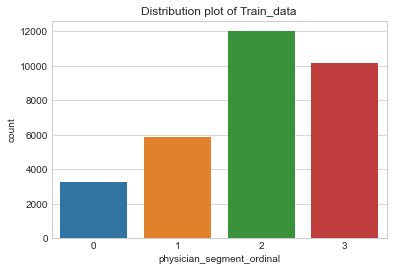

********************************************************************************
Number of data points in class 2:: 38.38 %
Number of data points in class 3:: 32.42 %
Number of data points in class 1:: 18.84 %
Number of data points in class 0:: 10.36 %
********************************************************************************


<AxesSubplot:xlabel='physician_segment_ordinal', ylabel='count'>

Text(0.5, 1.0, 'Distribution plot of CV_data')

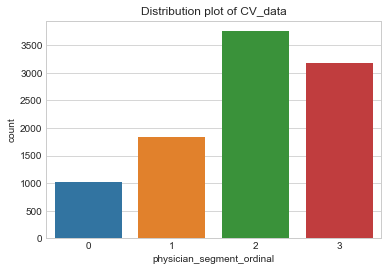

********************************************************************************
Number of data points in class 2:: 38.38 %
Number of data points in class 3:: 32.42 %
Number of data points in class 1:: 18.84 %
Number of data points in class 0:: 10.37 %
********************************************************************************


<AxesSubplot:xlabel='physician_segment_ordinal', ylabel='count'>

Text(0.5, 1.0, 'Distribution plot of Test_data')

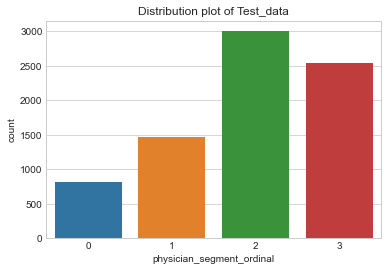

********************************************************************************
Number of data points in class 2:: 38.37 %
Number of data points in class 3:: 32.42 %
Number of data points in class 1:: 18.84 %
Number of data points in class 0:: 10.37 %
********************************************************************************


In [172]:
## Plotting distribution of target data for train,test and CV
y_dict={"Train_data":y_train,"CV_data":y_cv,"Test_data":y_test}
for y_key in y_dict.keys():
    vals=y_dict[y_key].value_counts(normalize=True)
    sns.countplot(y_dict[y_key])
    plt.title("Distribution plot of "+y_key)
    plt.show()
    print("*"*80)
    for val in vals.keys():
        print("Number of data points in class {}:: {} %".format(val,round(vals[val]*100,2)))
    print("*"*80)

## 4. Machine Learning Models

### 4.1 Random Model

******************** Random Model ******************** 

Log Loss on CV data using Random Model:: 1.6493404144855823 

Log Loss on Test data using Random Model:: 1.6379756696260408
Number of misclassified points  74.89454173590694
-------------------- Confusion matrix --------------------


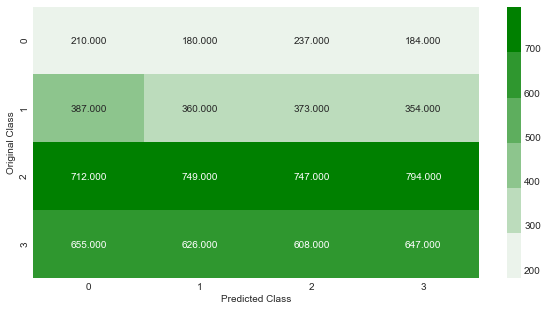

-------------------- Precision matrix --------------------


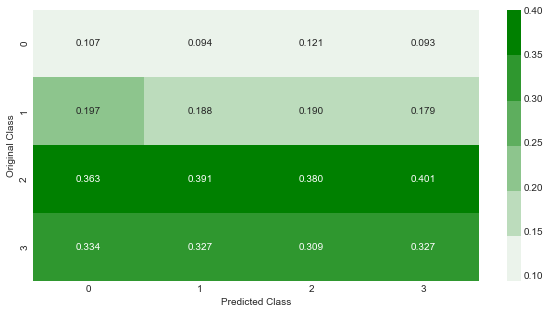

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


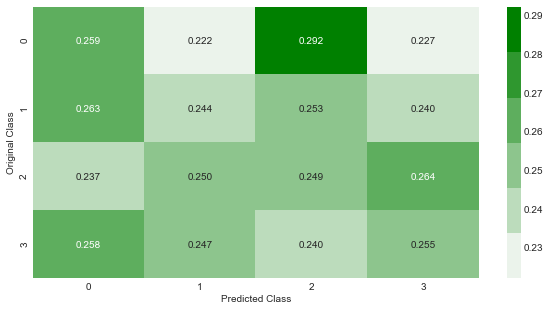

Sum of rows in precision matrix [1. 1. 1. 1.]


In [272]:
#reference: Applied AI course

num_classes=len(y_train.unique())
cv_data_len=X_cv.shape[0]
test_data_len=X_test.shape[0]

# Randomaly predicticting from one of 4 classes and we will do for each data points 
cv_predict_prob=np.zeros((cv_data_len,num_classes))
for i in range(cv_data_len):
    rand_prob=np.random.rand(1,4)
    cv_predict_prob[i]=(rand_prob/sum(sum(rand_prob))).flatten()
print("*"*20,"Random Model","*"*20,"\n")
print("Log Loss on CV data using Random Model::", log_loss(y_cv,cv_predict_prob),"\n")

test_predict_prob=np.zeros((test_data_len,num_classes))
for i in range(test_data_len):
    rand_prob=np.random.rand(1,4)
    test_predict_prob[i]=(rand_prob/sum(sum(rand_prob))).flatten()

train_predict_prob=np.zeros((X_train.shape[0],num_classes))
for i in range(X_train.shape[0]):
    rand_prob=np.random.rand(1,4)
    train_predict_prob[i]=(rand_prob/sum(sum(rand_prob))).flatten()

print("Log Loss on Test data using Random Model::", log_loss(y_test,test_predict_prob))
predict_y=np.argmax(test_predict_prob,axis=1)
plot_confusion_matrix(y_test,predict_y)
C=confusion_matrix(y_test,predict_y)
summary.append(["Basic","Random Model","Log loss",round(log_loss(y_train,train_predict_prob),2),
               round(log_loss(y_cv,cv_predict_prob),2),round(log_loss(y_test,test_predict_prob),2),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])

### 4.2 KNN Model

KNeighborsClassifier(n_jobs=3, n_neighbors=2)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_jobs=3,
                                                           n_neighbors=2))

KNeighborsClassifier(n_jobs=3)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_jobs=3))

KNeighborsClassifier(n_jobs=3, n_neighbors=8)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_jobs=3,
                                                           n_neighbors=8))

KNeighborsClassifier(n_jobs=3, n_neighbors=11)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_jobs=3,
                                                           n_neighbors=11))

KNeighborsClassifier(n_jobs=3, n_neighbors=14)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_jobs=3,
                                                           n_neighbors=14))

KNeighborsClassifier(n_jobs=3, n_neighbors=17)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_jobs=3,
                                                           n_neighbors=17))

KNeighborsClassifier(n_jobs=3, n_neighbors=20)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_jobs=3,
                                                           n_neighbors=20))

log_loss for k =  2 is 1.2079323558354957
log_loss for k =  5 is 1.1812418143974033
log_loss for k =  8 is 1.1741273686550335
log_loss for k =  11 is 1.1679790169943411
log_loss for k =  14 is 1.1637582745288502
log_loss for k =  17 is 1.1617404244264111
log_loss for k =  20 is 1.1590566456512683


<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Log Loss Train and CV data')

Text(0.5, 0, 'k-value')

Text(0, 0.5, 'log loss')

Text(2, 1.2079323558354957, '(2, 1.208)')

Text(5, 1.1812418143974033, '(5, 1.181)')

Text(8, 1.1741273686550335, '(8, 1.174)')

Text(11, 1.1679790169943411, '(11, 1.168)')

Text(14, 1.1637582745288502, '(14, 1.164)')

Text(17, 1.1617404244264111, '(17, 1.162)')

Text(20, 1.1590566456512683, '(20, 1.159)')

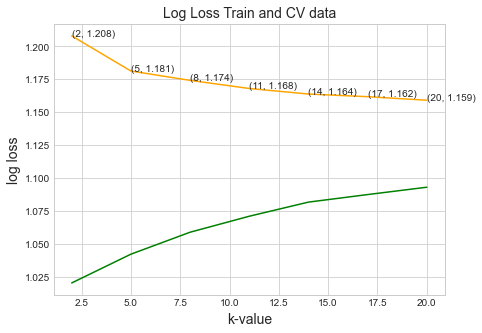

KNeighborsClassifier(n_jobs=3, n_neighbors=20)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_jobs=3,
                                                           n_neighbors=20))

Log Loss with 20-NN Model:: 1.1556374497834183
Number of misclassified points  50.69666368400869
-------------------- Confusion matrix --------------------


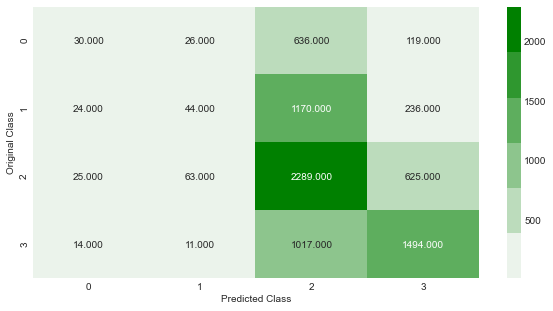

-------------------- Precision matrix --------------------


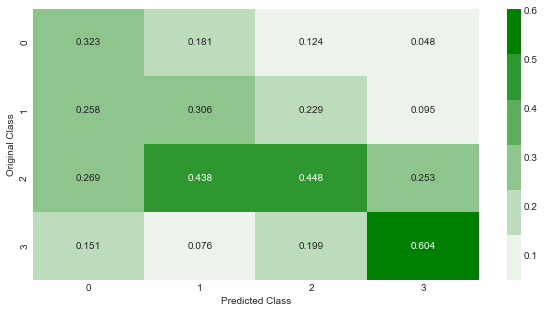

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


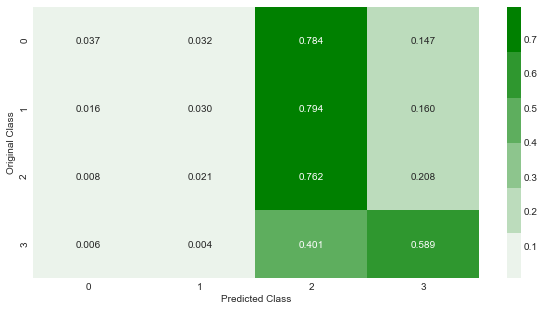

Sum of rows in precision matrix [1. 1. 1. 1.]


In [208]:
alpha=[k for k in range(2,22,3)]
cv_log_score=[]
train_log_score=[]
#************* Hyper Tuning *********
for k in alpha:
    model=KNeighborsClassifier(n_neighbors=k,n_jobs=3)
    model.fit(X_train,y_train)
    clf=CalibratedClassifierCV(base_estimator=model)
    clf.fit(X_train,y_train)
    predict_y=clf.predict_proba(X_cv)
    cv_log_score.append(log_loss(y_cv,predict_y,labels=model.classes_))
    train_log_score.append(log_loss(y_train,clf.predict_proba(X_train),labels=model.classes_))

for i in range(len(cv_log_score)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_score[i])
best_k=alpha[np.argmin(cv_log_score)]

#**************Plot Log Loss***********
plt.figure(figsize=(7,5))
plt.title("Log Loss Train and CV data",fontsize=14)
plt.plot(alpha,cv_log_score,c="orange")
plt.plot(alpha,train_log_score,c="g")
plt.xlabel("k-value" ,fontsize=14)
plt.ylabel("log loss",fontsize=14 )
for i in range(len(cv_log_score)):
    plt.annotate((alpha[i],round(cv_log_score[i],3)), (alpha[i], cv_log_score[i]))
plt.show()
#********** Train model with Best Hyper parameter********
model=KNeighborsClassifier(n_neighbors=best_k,n_jobs=3)
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)
#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("Log Loss with {}-NN Model:: {}".format(best_k,log_loss(y_test,predict_y)))
y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Basic","K-NN Model","Log loss",round(log_loss(y_train,clf.predict_proba(X_train)),3),
               round(log_loss(y_cv,clf.predict_proba(X_cv)),3),round(log_loss(y_test,clf.predict_proba(X_test)),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


### 4.3 Logistic Regression

SGDClassifier(alpha=1e-05, class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05,
                                                    class_weight='balanced',
                                                    loss='log'))

SGDClassifier(class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(class_weight='balanced',
                                                    loss='log'))

SGDClassifier(alpha=0.001, class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001,
                                                    class_weight='balanced',
                                                    loss='log'))

SGDClassifier(alpha=0.01, class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01,
                                                    class_weight='balanced',
                                                    loss='log'))

SGDClassifier(alpha=0.1, class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1,
                                                    class_weight='balanced',
                                                    loss='log'))

SGDClassifier(alpha=1, class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1,
                                                    class_weight='balanced',
                                                    loss='log'))

SGDClassifier(alpha=10, class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=10,
                                                    class_weight='balanced',
                                                    loss='log'))

SGDClassifier(alpha=100, class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=100,
                                                    class_weight='balanced',
                                                    loss='log'))

SGDClassifier(alpha=1000, class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1000,
                                                    class_weight='balanced',
                                                    loss='log'))

log_loss for alpha=  1e-05 is 1.02079197003783
log_loss for alpha=  0.0001 is 1.0167794902102876
log_loss for alpha=  0.001 is 1.0535278594149853
log_loss for alpha=  0.01 is 1.1621267947671492
log_loss for alpha=  0.1 is 1.2120004213098352
log_loss for alpha=  1 is 1.2353966518038697
log_loss for alpha=  10 is 1.266378460759331
log_loss for alpha=  100 is 1.268417367923001
log_loss for alpha=  1000 is 1.2684811912330525


<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Log Loss Train and CV data')

Text(0.5, 0, 'k-value')

Text(0, 0.5, 'log loss')

Text(1e-05, 1.02079197003783, '(1e-05, 1.021)')

Text(0.0001, 1.0167794902102876, '(0.0001, 1.017)')

Text(0.001, 1.0535278594149853, '(0.001, 1.054)')

Text(0.01, 1.1621267947671492, '(0.01, 1.162)')

Text(0.1, 1.2120004213098352, '(0.1, 1.212)')

Text(1, 1.2353966518038697, '(1, 1.235)')

Text(10, 1.266378460759331, '(10, 1.266)')

Text(100, 1.268417367923001, '(100, 1.268)')

Text(1000, 1.2684811912330525, '(1000, 1.268)')

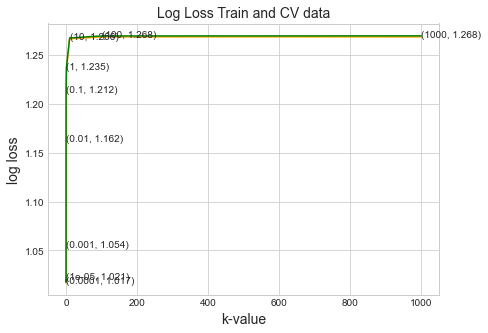

SGDClassifier(class_weight='balanced', loss='log')

CalibratedClassifierCV(base_estimator=SGDClassifier(class_weight='balanced',
                                                    loss='log'))

Log Loss with SGD-LR Model:: 1.0178739226055653
Number of misclassified points  42.77131535216669
-------------------- Confusion matrix --------------------


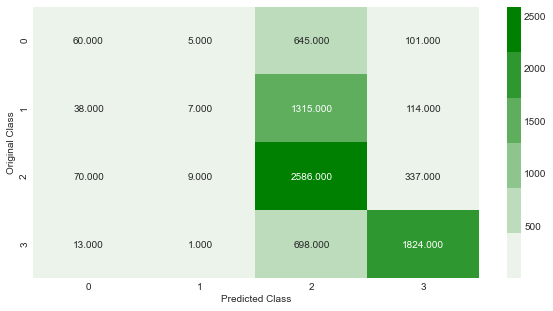

-------------------- Precision matrix --------------------


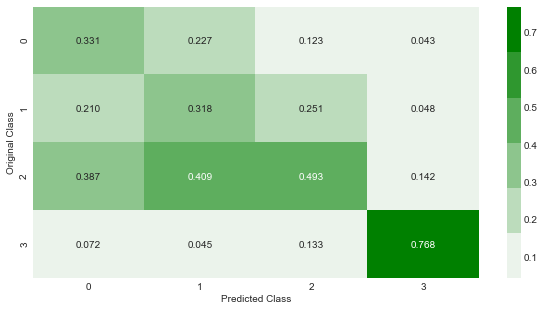

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


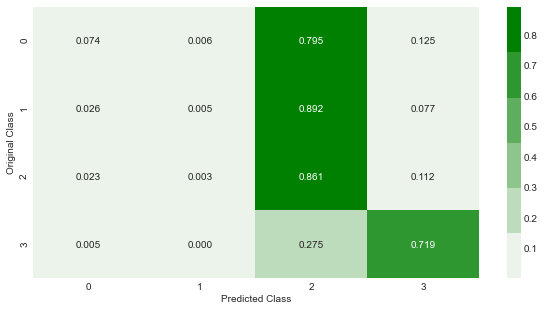

Sum of rows in precision matrix [1. 1. 1. 1.]


In [173]:
alpha= [10 ** x for x in range(-5, 4)]

cv_log_score=[]
train_log_score=[]
#************* Hyper Tuning *********
for i in alpha:
    model=SGDClassifier(penalty='l2',alpha=i,class_weight='balanced',loss='log')
    model.fit(X_train,y_train)
    clf=CalibratedClassifierCV(base_estimator=model)
    clf.fit(X_train,y_train)
    predict_y=clf.predict_proba(X_cv)
    cv_log_score.append(log_loss(y_cv,predict_y,labels=model.classes_))
    train_log_score.append(log_loss(y_train,clf.predict_proba(X_train),labels=model.classes_))

for i in range(len(cv_log_score)):
    print ('log_loss for alpha= ',alpha[i],'is',cv_log_score[i])
best_val=alpha[np.argmin(cv_log_score)]

#**************Plot Log Loss***********
plt.figure(figsize=(7,5))
plt.title("Log Loss Train and CV data",fontsize=14)
plt.plot(alpha,cv_log_score,c="orange")
plt.plot(alpha,train_log_score,c="g")
plt.xlabel("k-value" ,fontsize=14)
plt.ylabel("log loss",fontsize=14 )
for i in range(len(cv_log_score)):
    plt.annotate((alpha[i],round(cv_log_score[i],3)), (alpha[i], cv_log_score[i]))
plt.show()
#********** Train model with Best Hyper parameter********
model=model=SGDClassifier(penalty='l2',alpha=best_val,class_weight='balanced',loss='log')
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)
#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("Log Loss with SGD-LR Model:: {}".format(log_loss(y_test,predict_y)))

y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Basic","SGD-LR","Log loss",round(log_loss(y_train,clf.predict_proba(X_train)),3),
               round(log_loss(y_cv,clf.predict_proba(X_cv)),3),round(log_loss(y_test,clf.predict_proba(X_test)),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


In [175]:
# save the model to disk

filename = base_dir+'/LGR_model.pkl'

if not os.path.isfile(filename):
    joblib.dump(clf, filename)
else:
    clf=joblib.load(filename)

### 4.4 Support vector Machine

SGDClassifier(alpha=1e-05, class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05,
                                                    class_weight='balanced'))

SGDClassifier(class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(class_weight='balanced'))

SGDClassifier(alpha=0.001, class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001,
                                                    class_weight='balanced'))

SGDClassifier(alpha=0.01, class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01,
                                                    class_weight='balanced'))

SGDClassifier(alpha=0.1, class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1,
                                                    class_weight='balanced'))

SGDClassifier(alpha=1, class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1,
                                                    class_weight='balanced'))

SGDClassifier(alpha=10, class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=10,
                                                    class_weight='balanced'))

SGDClassifier(alpha=100, class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=100,
                                                    class_weight='balanced'))

SGDClassifier(alpha=1000, class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1000,
                                                    class_weight='balanced'))

log_loss for alpha =  1e-05 is 1.0319687495053311
log_loss for alpha =  0.0001 is 1.0287513412258067
log_loss for alpha =  0.001 is 1.0339958845321706
log_loss for alpha =  0.01 is 1.0366465499741222
log_loss for alpha =  0.1 is 1.0345330613771704
log_loss for alpha =  1 is 1.1470212332207848
log_loss for alpha =  10 is 1.268742672069097
log_loss for alpha =  100 is 1.2686709676478114
log_loss for alpha =  1000 is 1.2686709504536686


<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Log Loss Train and CV data')

Text(0.5, 0, 'k-value')

Text(0, 0.5, 'log loss')

Text(1e-05, 1.0319687495053311, '(1e-05, 1.032)')

Text(0.0001, 1.0287513412258067, '(0.0001, 1.029)')

Text(0.001, 1.0339958845321706, '(0.001, 1.034)')

Text(0.01, 1.0366465499741222, '(0.01, 1.037)')

Text(0.1, 1.0345330613771704, '(0.1, 1.035)')

Text(1, 1.1470212332207848, '(1, 1.147)')

Text(10, 1.268742672069097, '(10, 1.269)')

Text(100, 1.2686709676478114, '(100, 1.269)')

Text(1000, 1.2686709504536686, '(1000, 1.269)')

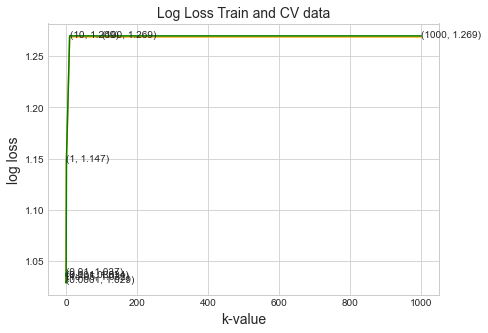

SGDClassifier(class_weight='balanced')

CalibratedClassifierCV(base_estimator=SGDClassifier(class_weight='balanced'))

Log Loss with SGD-SVM Model:: 1.0247165043222473
Number of misclassified points  41.79982104052154
-------------------- Confusion matrix --------------------


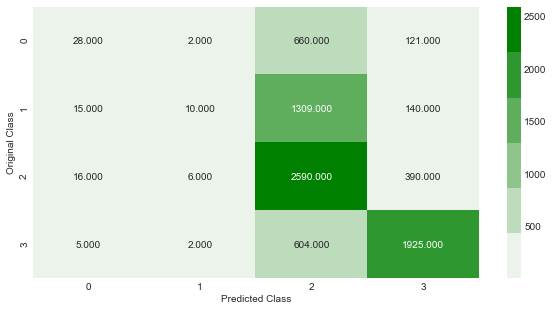

-------------------- Precision matrix --------------------


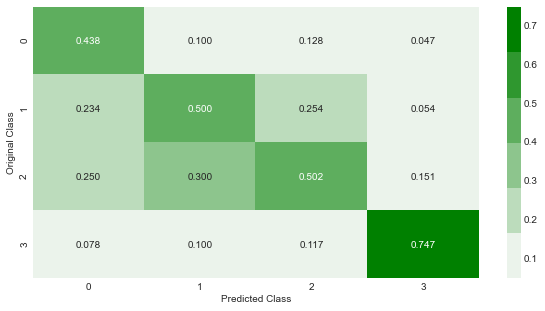

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


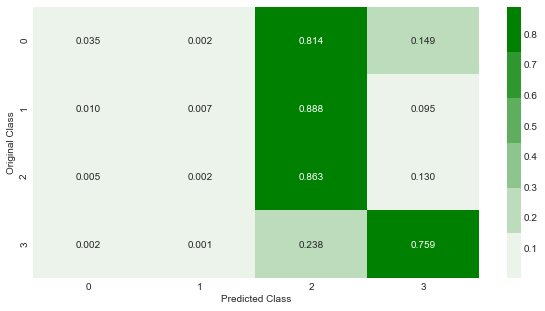

Sum of rows in precision matrix [1. 1. 1. 1.]


In [210]:
alpha= [10 ** x for x in range(-5, 4)]

cv_log_score=[]
train_log_score=[]
#************* Hyper Tuning *********
for i in alpha:
    model=SGDClassifier(penalty='l2',alpha=i,class_weight='balanced',loss='hinge')
    model.fit(X_train,y_train)
    clf=CalibratedClassifierCV(base_estimator=model)
    clf.fit(X_train,y_train)
    predict_y=clf.predict_proba(X_cv)
    cv_log_score.append(log_loss(y_cv,predict_y,labels=model.classes_))
    train_log_score.append(log_loss(y_train,clf.predict_proba(X_train),labels=model.classes_))

for i in range(len(cv_log_score)):
    print ('log_loss for alpha = ',alpha[i],'is',cv_log_score[i])
best_val=alpha[np.argmin(cv_log_score)]

#**************Plot Log Loss***********
plt.figure(figsize=(7,5))
plt.title("Log Loss Train and CV data",fontsize=14)
plt.plot(alpha,cv_log_score,c="orange")
plt.plot(alpha,train_log_score,c="g")
plt.xlabel("k-value" ,fontsize=14)
plt.ylabel("log loss",fontsize=14 )
for i in range(len(cv_log_score)):
    plt.annotate((alpha[i],round(cv_log_score[i],3)), (alpha[i], cv_log_score[i]))
plt.show()
#********** Train model with Best Hyper parameter********
model=model=SGDClassifier(penalty='l2',alpha=best_val,class_weight='balanced',loss='hinge')
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)
#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("Log Loss with SGD-SVM Model:: {}".format(log_loss(y_test,predict_y)))

y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Basic","SGD-SVM","Log loss",round(log_loss(y_train,clf.predict_proba(X_train)),3),
               round(log_loss(y_cv,clf.predict_proba(X_cv)),3),round(log_loss(y_test,clf.predict_proba(X_test)),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


### 4.5 Random Forest Classifier( With Log Loss)

In [211]:
%%time
model=RandomForestClassifier(class_weight="balanced",min_samples_split=2)
params={
 'n_estimators':[100,200,500,1000,2000],
 'max_depth':[3,5,10],
 
}
clf=RandomizedSearchCV(estimator=model,param_distributions=params,verbose=10,scoring="neg_log_loss",n_jobs=3,return_train_score=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    9.9s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   58.8s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  6.4min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  7.5min finished


Wall time: 9min 16s


RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=3,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000]},
                   return_train_score=True, scoring='neg_log_loss', verbose=10)

In [212]:
results=pd.DataFrame(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.824593,0.202863,0.230542,0.041787,200,10,"{'n_estimators': 200, 'max_depth': 10}",-0.991937,-0.981256,-0.988738,...,-0.983522,0.006761,4,-0.852179,-0.852025,-0.851313,-0.853590,-0.851754,-0.852172,0.000767
1,35.787179,0.355402,1.341181,0.034310,1000,10,"{'n_estimators': 1000, 'max_depth': 10}",-0.991384,-0.980690,-0.989080,...,-0.983078,0.006803,2,-0.852032,-0.849421,-0.851320,-0.853601,-0.851021,-0.851479,0.001362
2,1.464965,0.043645,0.059917,0.002114,100,3,"{'n_estimators': 100, 'max_depth': 3}",-1.109649,-1.101866,-1.109037,...,-1.104512,0.004888,10,-1.097636,-1.101307,-1.100731,-1.106483,-1.101283,-1.101488,0.002844
3,14.449662,0.311352,0.550276,0.010583,1000,3,"{'n_estimators': 1000, 'max_depth': 3}",-1.109334,-1.099241,-1.106270,...,-1.102106,0.005949,9,-1.097904,-1.098699,-1.098245,-1.102342,-1.098429,-1.099124,0.001630
4,29.275666,0.314148,1.123754,0.029869,2000,3,"{'n_estimators': 2000, 'max_depth': 3}",-1.109636,-1.100744,-1.104878,...,-1.102049,0.005475,8,-1.098210,-1.100039,-1.096916,-1.102966,-1.097160,-1.099058,0.002243


In [213]:
print("Best score ::",clf.best_score_)

Best score :: -0.9828845755330423


In [214]:
train_auc_df = results.pivot("param_n_estimators", "param_max_depth", "mean_train_score")
cv_auc_df=results.pivot("param_n_estimators", "param_max_depth", "mean_test_score")

<AxesSubplot:xlabel='param_max_depth', ylabel='param_n_estimators'>

Text(0.5, 1.0, 'AUC heatmap for training data')

Text(0.5, 19.5, 'n_estimators')

Text(37.5, 0.5, 'learning_rate')

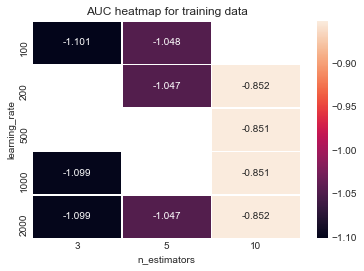

In [215]:

sns.heatmap(train_auc_df,annot=True,linewidths=.5,fmt='.3f')
plt.title("AUC heatmap for training data")
plt.xlabel("n_estimators")
plt.ylabel("learning_rate")
plt.show()


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=2000)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                             max_depth=10,
                                                             n_estimators=2000))

Log Loss with RF Model:: 0.9249973498868942
Number of misclassified points  38.02888917295155
-------------------- Confusion matrix --------------------


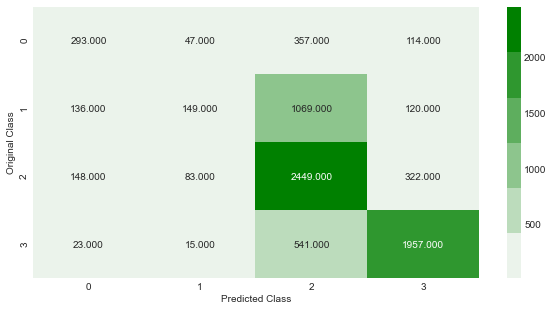

-------------------- Precision matrix --------------------


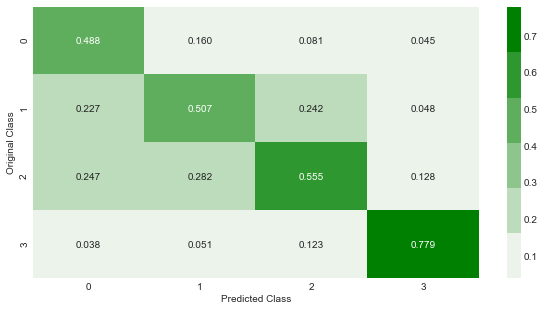

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


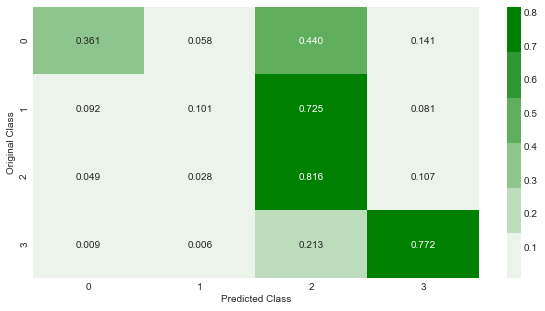

Sum of rows in precision matrix [1. 1. 1. 1.]


In [216]:
#Train Random Forest with Best param
best_param=clf.best_params_
#********** Train model with Best Hyper parameter********

model=RandomForestClassifier(n_estimators=best_param["n_estimators"],class_weight="balanced",min_samples_split=2,
                             max_depth=best_param["max_depth"],
                        )
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)

#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("Log Loss with RF Model:: {}".format(log_loss(y_test,predict_y)))

y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Basic","Random Forest","Log loss",round(log_loss(y_train,clf.predict_proba(X_train)),3),
               round(log_loss(y_cv,clf.predict_proba(X_cv)),3),round(log_loss(y_test,clf.predict_proba(X_test)),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


#### 4.5.1 Extract top 25 Important Features

In [217]:
imp_feature

array([1163,  295,  761,  699,  366, 1036,  302,  251,  336,  342, 1122,
        221,  681,  137,  521, 4913, 4338,  722,  263,  372,  153, 7916,
       7780, 8705, 9100, 8987, 6593, 3125, 2762,  649,  918,  212,    0,
       8595, 7309, 4715, 9001, 7799, 6819])

<Figure size 360x1080 with 0 Axes>

Text(0.5, 1.0, 'Feature Important plot')

<BarContainer object of 25 artists>

Text(0.5, 0, 'Feature Importance')

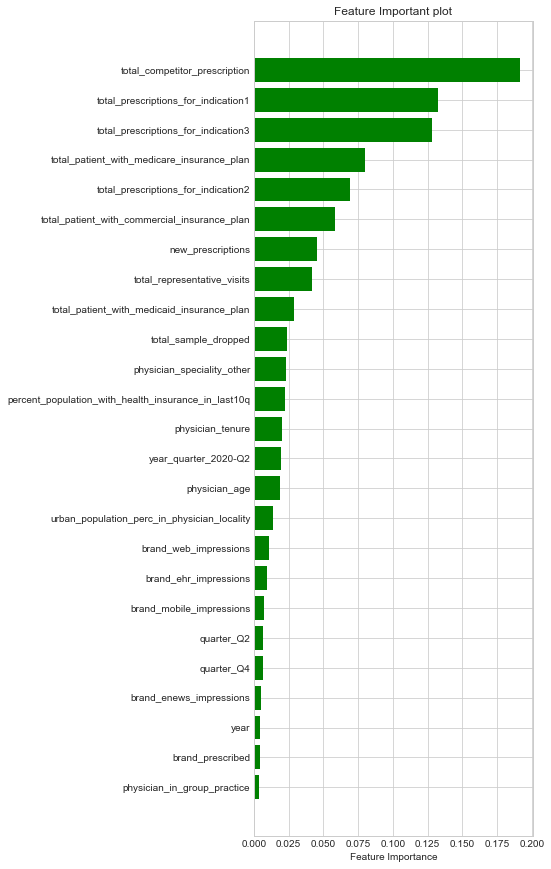

In [218]:
plt.figure(figsize=(5,15))
features=list(X_train_cat.columns.values)
features.extend(numerical_columns)
features=np.array(features)
imp_feature=model.feature_importances_
sorted_idx=imp_feature.argsort()[-25:]
plt.title("Feature Important plot")
plt.barh(features[sorted_idx], imp_feature[sorted_idx],color='g')
plt.xlabel("Feature Importance")
plt.show()

In [219]:
from sklearn.inspection import permutation_importance

In [220]:
perm_importance = permutation_importance(model, X_test, y_test)

<Figure size 360x1080 with 0 Axes>

Text(0.5, 1.0, 'Permutation Feature Important plot')

<BarContainer object of 25 artists>

Text(0.5, 0, 'Feature Importance')

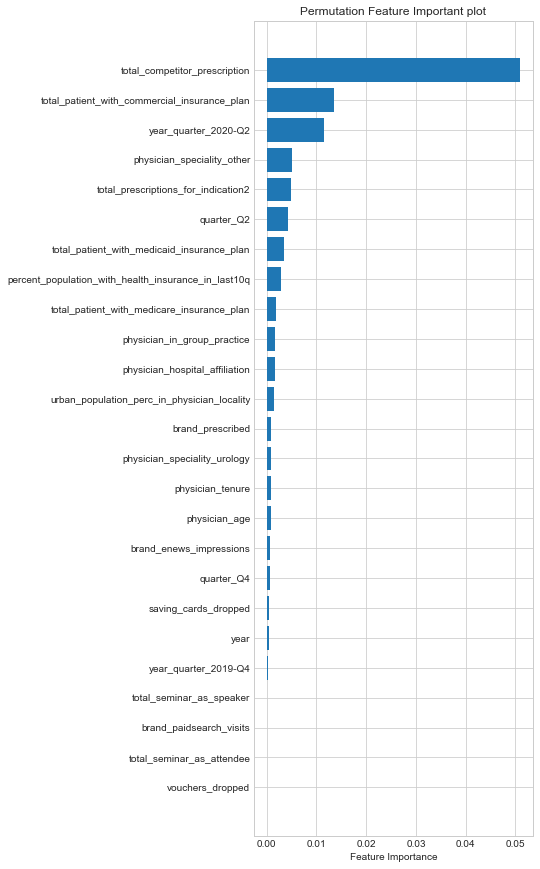

In [221]:
plt.figure(figsize=(5,15))
p_imp_feature=perm_importance.importances_mean
sorted_idx=p_imp_feature.argsort()[-25:]
plt.title("Permutation Feature Important plot")
plt.barh(features[sorted_idx], p_imp_feature[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

### 4.6 Random Forest Classifier( With F1-score)

In [222]:
%%time
model=RandomForestClassifier(class_weight="balanced",min_samples_split=2)
params={
 'n_estimators':[100,200,500,1000,2000],
 'max_depth':[3,5,10],
 
}
clf=RandomizedSearchCV(estimator=model,param_distributions=params,verbose=10,scoring="f1_macro",n_jobs=3,return_train_score=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   38.5s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  5.0min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  6.5min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  7.0min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  7.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  8.0min finished


Wall time: 11min 18s


RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=3,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000]},
                   return_train_score=True, scoring='f1_macro', verbose=10)

In [223]:
results=pd.DataFrame(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.225694,0.126066,0.621725,0.189112,1000,3,"{'n_estimators': 1000, 'max_depth': 3}",0.489714,0.489595,0.492646,...,0.492502,0.003573,10,0.494714,0.495813,0.497325,0.494312,0.495693,0.495572,0.001046
1,44.646638,0.890511,1.210620,0.279430,2000,5,"{'n_estimators': 2000, 'max_depth': 5}",0.504175,0.499804,0.497606,...,0.502992,0.004125,7,0.511990,0.512749,0.514501,0.510514,0.512031,0.512357,0.001295
2,80.753484,0.172456,3.332965,0.741370,2000,10,"{'n_estimators': 2000, 'max_depth': 10}",0.546298,0.533268,0.530107,...,0.538333,0.005859,1,0.679896,0.682732,0.681123,0.678267,0.684799,0.681363,0.002257
3,7.804454,0.105810,0.228072,0.074983,200,10,"{'n_estimators': 200, 'max_depth': 10}",0.542540,0.532527,0.531247,...,0.537513,0.004798,4,0.676805,0.678158,0.676601,0.676380,0.679897,0.677568,0.001319
4,39.343761,0.613256,1.697220,0.485132,1000,10,"{'n_estimators': 1000, 'max_depth': 10}",0.543192,0.532312,0.529045,...,0.537837,0.006041,3,0.681207,0.680324,0.680091,0.678811,0.684514,0.680990,0.001922


In [224]:
print("Best score ::",clf.best_score_)

Best score :: 0.5383327017608591


In [225]:
train_auc_df = results.pivot("param_n_estimators", "param_max_depth", "mean_train_score")
cv_auc_df=results.pivot("param_n_estimators", "param_max_depth", "mean_test_score")

<AxesSubplot:xlabel='param_max_depth', ylabel='param_n_estimators'>

Text(0.5, 1.0, 'AUC heatmap for training data')

Text(0.5, 19.5, 'n_estimators')

Text(37.5, 0.5, 'learning_rate')

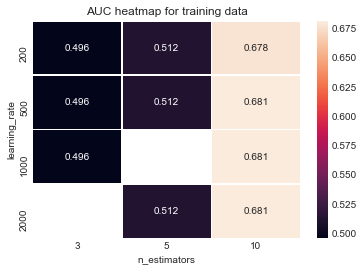

In [226]:

sns.heatmap(train_auc_df,annot=True,linewidths=.5,fmt='.3f')
plt.title("AUC heatmap for training data")
plt.xlabel("n_estimators")
plt.ylabel("learning_rate")
plt.show()


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=2000)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                             max_depth=10,
                                                             n_estimators=2000))

F1_score with RF Model:: 0.5049891905428402
Number of misclassified points  38.054454812731684
-------------------- Confusion matrix --------------------


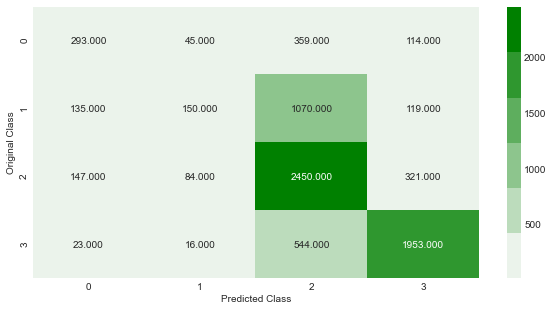

-------------------- Precision matrix --------------------


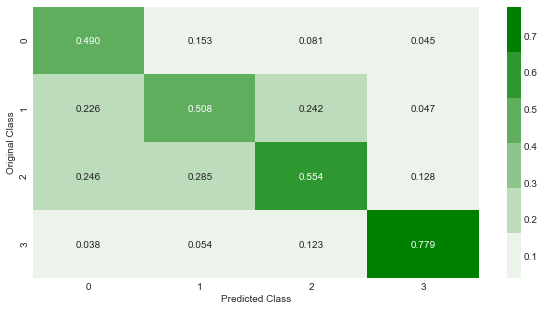

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


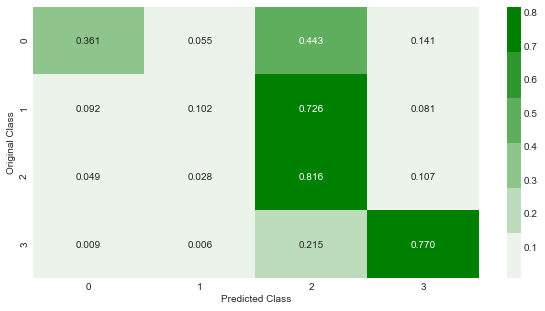

Sum of rows in precision matrix [1. 1. 1. 1.]


In [227]:
#Train Random Forest with Best param
best_param=clf.best_params_
#********** Train model with Best Hyper parameter********

model=RandomForestClassifier(n_estimators=best_param["n_estimators"],class_weight="balanced",min_samples_split=2,
                             max_depth=best_param["max_depth"],
                        )
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)

#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("F1_score with RF Model:: {}".format(f1_score(y_test,np.argmax(predict_y,axis=1),average="macro")))

y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Basic","Random Forest","F1_macro",round(f1_score(y_train,np.argmax(clf.predict_proba(X_train),axis=1),average="macro"),3),
               round(f1_score(y_cv,np.argmax(clf.predict_proba(X_cv),axis=1),average="macro"),3),round(f1_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),average="macro"),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


#### 4.6.1 Extract top 25 Important Features

<Figure size 360x1080 with 0 Axes>

Text(0.5, 1.0, 'Feature Important plot')

<BarContainer object of 25 artists>

Text(0.5, 0, 'Feature Importance')

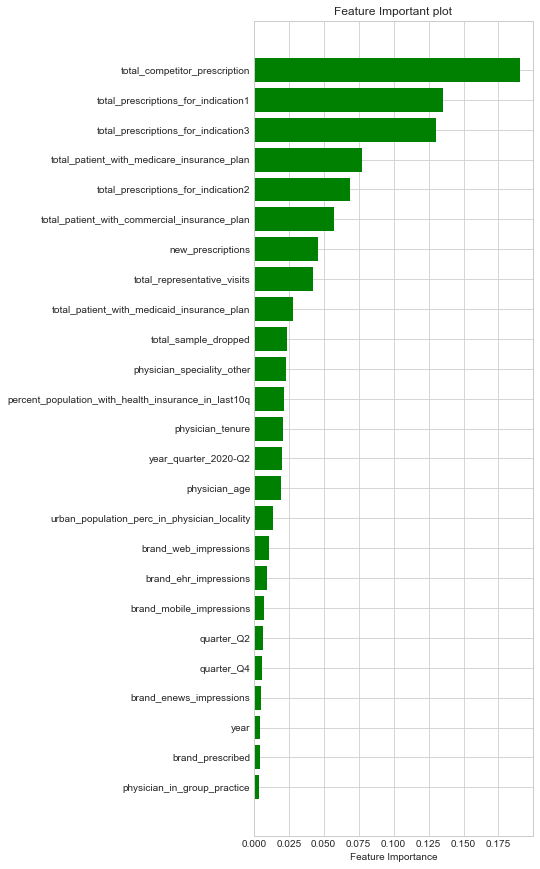

In [228]:
plt.figure(figsize=(5,15))
features=list(X_train_cat.columns.values)
features.extend(numerical_columns)
features=np.array(features)
imp_feature=model.feature_importances_
sorted_idx=imp_feature.argsort()[-25:]
plt.title("Feature Important plot")
plt.barh(features[sorted_idx], imp_feature[sorted_idx],color='g')
plt.xlabel("Feature Importance")
plt.show()

### 4.7 LGBM Model with Hyper Parameterization (for log loss metric)

In [273]:
%%time
model=LGBMClassifier(class_weight="balanced")

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    "reg_lambda":[0.001,0.01]
}
clf=RandomizedSearchCV(estimator=model,param_distributions=params,verbose=10,n_jobs=3,return_train_score=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   20.5s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  3.2min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  3.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  3.9min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Wall time: 4min 23s


RandomizedSearchCV(estimator=LGBMClassifier(class_weight='balanced'), n_jobs=3,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'objective': 'multiclass',
                                        'reg_lambda': [0.001, 0.01],
                                        'subsample': [0.5, 0.7, 0.9, 1]},
                   return_train_score=True, verbose=10)

In [274]:
print("Best score after hyper parameter Tunning of LGBMClassifier ::",clf.best_score_)

Best score after hyper parameter Tunning of LGBMClassifier :: 0.6875561588244853


LGBMClassifier(class_weight='balanced', colsample_bytree=0.9,
               learning_rate=0.15, max_depth=10, n_estimators=2000,
               objective='l', reg_lambda=0.01, subsample=0.9)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


CalibratedClassifierCV(base_estimator=LGBMClassifier(class_weight='balanced',
                                                     colsample_bytree=0.9,
                                                     learning_rate=0.15,
                                                     max_depth=10,
                                                     n_estimators=2000,
                                                     objective='l',
                                                     reg_lambda=0.01,
                                                     subsample=0.9))

Log Loss with LGBMClassifier:: 0.8056251410904365
Number of misclassified points  29.720056244407516
-------------------- Confusion matrix --------------------


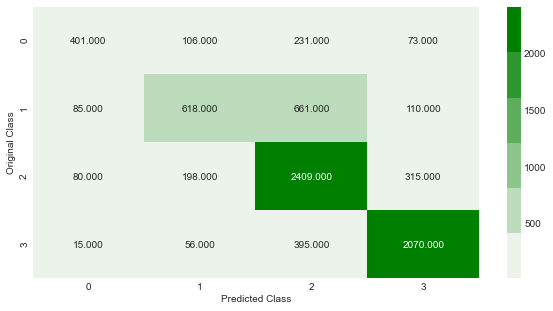

-------------------- Precision matrix --------------------


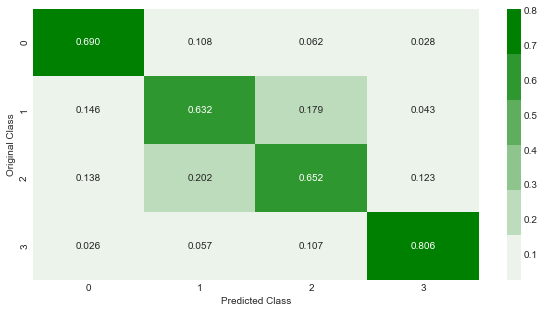

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


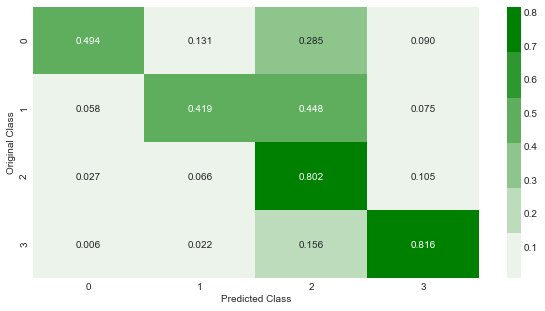

Sum of rows in precision matrix [1. 1. 1. 1.]


In [275]:
#Train Random Forest with Best param
best_param=clf.best_params_
#********** Train model with Best Hyper parameter********

model=LGBMClassifier(learning_rate=best_param["learning_rate"],
                     n_estimators=best_param["n_estimators"],
                     max_depth=best_param["max_depth"],
                     colsample_bytree=best_param["colsample_bytree"],
                     subsample=best_param["subsample"],
                     objective=best_param["objective"],
                     class_weight="balanced",reg_lambda=best_param["reg_lambda"]
                        )
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)

#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("Log Loss with LGBMClassifier:: {}".format(log_loss(y_test,predict_y)))

y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Basic","LGBMClassifier","Log loss",round(log_loss(y_train,clf.predict_proba(X_train)),3),
               round(log_loss(y_cv,clf.predict_proba(X_cv)),3),round(log_loss(y_test,clf.predict_proba(X_test)),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


### 4.7 LGBM Model with Hyper Parameterization (for F1-micro)

In [232]:
%%time
model=LGBMClassifier(class_weight="balanced")

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    "reg_lambda":[0.001,0.01]
}
clf=RandomizedSearchCV(estimator=model,param_distributions=params,verbose=10,scoring="f1_micro",n_jobs=3,return_train_score=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   19.4s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  3.8min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  5.1min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  5.3min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Wall time: 5min 26s


RandomizedSearchCV(estimator=LGBMClassifier(class_weight='balanced'), n_jobs=3,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'objective': 'multiclass',
                                        'reg_lambda': [0.001, 0.01],
                                        'subsample': [0.5, 0.7, 0.9, 1]},
                   return_train_score=True, scoring='f1_micro', verbose=10)

In [233]:
print("Best score after hyper parameter Tunning of LGBMClassifier ::",clf.best_score_)

Best score after hyper parameter Tunning of LGBMClassifier :: 0.6370641986629059


LGBMClassifier(class_weight='balanced', colsample_bytree=1, learning_rate=0.2,
               max_depth=10, n_estimators=200, objective='m', reg_lambda=0.01,
               subsample=0.5)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


CalibratedClassifierCV(base_estimator=LGBMClassifier(class_weight='balanced',
                                                     colsample_bytree=1,
                                                     learning_rate=0.2,
                                                     max_depth=10,
                                                     n_estimators=200,
                                                     objective='m',
                                                     reg_lambda=0.01,
                                                     subsample=0.5))

F1_score with LGBMClassifier:: 0.6680301674549406
Number of misclassified points  33.196983254505945
-------------------- Confusion matrix --------------------


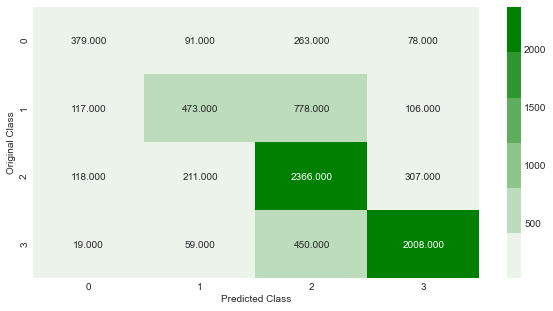

-------------------- Precision matrix --------------------


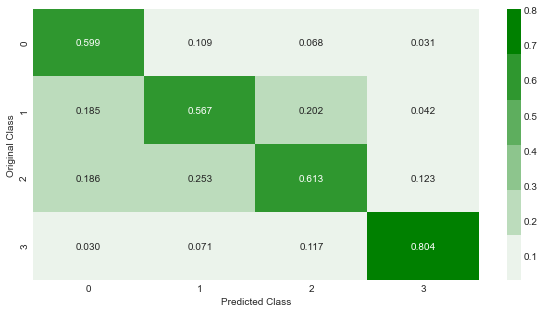

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


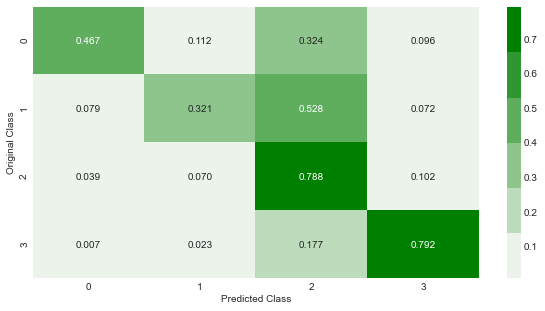

Sum of rows in precision matrix [1. 1. 1. 1.]


In [234]:
#Train Random Forest with Best param
best_param=clf.best_params_
#********** Train model with Best Hyper parameter********

model=LGBMClassifier(learning_rate=best_param["learning_rate"],
                     n_estimators=best_param["n_estimators"],
                     max_depth=best_param["max_depth"],
                     colsample_bytree=best_param["colsample_bytree"],
                     subsample=best_param["subsample"],
                     objective=best_param["objective"],
                     class_weight="balanced",
                     reg_lambda=best_param["reg_lambda"]
                        )
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)


#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("F1_score with LGBMClassifier:: {}".format(f1_score(y_test,np.argmax(predict_y,axis=1),average="micro")))

y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Basic","LGBMClassifier","F1_micro",round(f1_score(y_train,np.argmax(clf.predict_proba(X_train),axis=1),average="micro"),3),
               round(f1_score(y_cv,np.argmax(clf.predict_proba(X_cv),axis=1),average="micro"),3),round(f1_score(y_test,np.argmax(clf.predict_proba(X_test),axis=1),average="micro"),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


#### 4.7.1 Top 25 Important Features

<Figure size 360x1080 with 0 Axes>

Text(0.5, 1.0, 'Feature Important plot')

<BarContainer object of 25 artists>

Text(0.5, 0, 'Feature Importance')

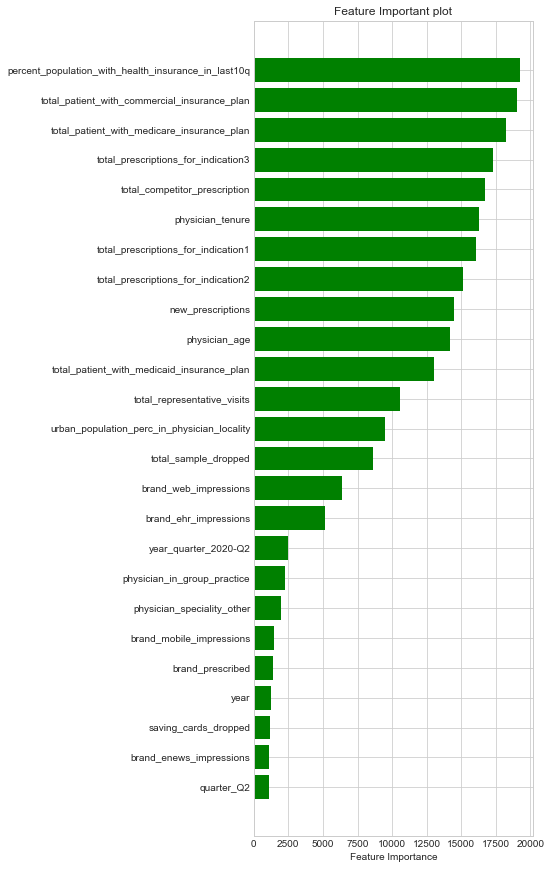

In [276]:
plt.figure(figsize=(5,15))
features=list(X_train_cat.columns.values)
features.extend(numerical_columns)
features=np.array(features)
imp_feature=model.feature_importances_
sorted_idx=imp_feature.argsort()[-25:]
plt.title("Feature Important plot")
plt.barh(features[sorted_idx], imp_feature[sorted_idx],color='g')
plt.xlabel("Feature Importance")
plt.show()

In [277]:
def important_feature_data(data,top_index):
    temp=[]
    for i,index in enumerate(top_index):
        temp.append(data[:,index])
    return np.array(temp).T
X_train=important_feature_data(X_train,sorted_idx)
X_cv=important_feature_data(X_cv,sorted_idx)
X_test=important_feature_data(X_test,sorted_idx)


#### 4.7.2 Saving top 25 features data for future use

In [278]:
top_features=features[sorted_idx]
df=pd.DataFrame(X_train,columns=top_features)
df["physician_segment_ordinal"]=y_train.values
df.head()

,quarter_Q2,brand_enews_impressions,saving_cards_dropped,year,brand_prescribed,brand_mobile_impressions,physician_speciality_other,physician_in_group_practice,year_quarter_2020-Q2,brand_ehr_impressions,...,new_prescriptions,total_prescriptions_for_indication2,total_prescriptions_for_indication1,physician_tenure,total_competitor_prescription,total_prescriptions_for_indication3,total_patient_with_medicare_insurance_plan,total_patient_with_commercial_insurance_plan,percent_population_with_health_insurance_in_last10q,physician_segment_ordinal
0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.001221,...,0.001583,0.007962,0.036757,0.261538,0.036188,0.032518,0.007164,0.045993,0.959596,1
1,0.0,0.020833,0.0,0.0,0.0,0.007143,1.0,0.0,0.0,0.002442,...,0.028232,0.008324,0.042162,0.000000,0.046625,0.012856,0.009692,0.082504,0.929293,2
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.039088,0.075676,0.507692,0.066591,0.022435,0.068268,0.009483,0.010101,3
3,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.001221,...,0.007916,0.002895,0.055135,0.430769,0.028928,0.008571,0.008007,0.062589,0.292929,1
4,1.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.001221,...,0.020844,0.007962,0.062162,0.138462,0.040839,0.032014,0.001686,0.125652,0.444444,2


In [279]:
top_features=features[sorted_idx]
X_train=pd.DataFrame(X_train,columns=top_features)
X_train["physician_segment_ordinal"]=y_train.values
X_cv=pd.DataFrame(X_cv,columns=top_features)
X_cv["physician_segment_ordinal"]=y_cv.values
X_test=pd.DataFrame(X_test,columns=top_features)
X_test["physician_segment_ordinal"]=y_test.values


ValueError: Length of values (9779) does not match length of index (7823)

In [281]:
print("*"*10,"Shape after combining top 25 feature and physician_segment_ordinal","*"*10)
print("Shape of X_train::", X_train.shape)
print("Shape of X_cv::", X_cv.shape)
print("Shape of X_test::", X_test.shape)

********** Shape after combining top 25 feature and physician_segment_ordinal **********
Shape of X_train:: (31292, 26)
Shape of X_cv:: (9779, 26)
Shape of X_test:: (7823, 26)


In [20]:
#********** TRAIN DATA ***********
if not os.path.isfile(base_dir+"/top_25_train.csv"):
    X_train.to_csv(base_dir+"/top_25_train.csv",index_label=False)
    X_train.drop(columns=["physician_segment_ordinal"],inplace=True)
else:
    X_train=pd.read_csv(base_dir+"/top_25_train.csv")
    y_train=X_train['physician_segment_ordinal']
    X_train.drop(columns=["physician_segment_ordinal"],inplace=True)
#********** CV DATA ***********    
if not os.path.isfile(base_dir+"/top_25_cv.csv"):
    X_cv.to_csv(base_dir+"/top_25_cv.csv",index_label=False)
    X_cv.drop(columns=["physician_segment_ordinal"],inplace=True)
else:
    X_cv=pd.read_csv(base_dir+"/top_25_cv.csv")
    y_cv=X_cv['physician_segment_ordinal']
    X_cv.drop(columns=["physician_segment_ordinal"],inplace=True)
#********** TEST DATA ***********
if not os.path.isfile(base_dir+"/top_25_test.csv"):
    X_test.to_csv(base_dir+"/top_25_test.csv",index_label=False)
    X_test.drop(columns=["physician_segment_ordinal"],inplace=True)
else:
    X_test=pd.read_csv(base_dir+"/top_25_test.csv")
    y_test=X_test['physician_segment_ordinal']
    X_test.drop(columns=["physician_segment_ordinal"],inplace=True)

In [ ]:
# #********** TRAIN DATA ***********
# if not os.path.isfile(base_dir+"/preprocess_X_train.csv"):
#     X_train.to_csv(base_dir+"/preprocess_X_train.csv",index_label=False)
#     X_train.drop(columns=["physician_segment_ordinal"],inplace=True)
# else:
#     X_train=pd.read_csv(base_dir+"/preprocess_X_train.csv")
#     y_train=X_train['physician_segment_ordinal']
#     X_train.drop(columns=["physician_segment_ordinal"],inplace=True)
# #********** CV DATA ***********    
# if not os.path.isfile(base_dir+"/preprocess_X_cv.csv"):
#     X_cv.to_csv(base_dir+"/preprocess_X_cv.csv",index_label=False)
#     X_cv.drop(columns=["physician_segment_ordinal"],inplace=True)
# else:
#     X_cv=pd.read_csv(base_dir+"/preprocess_X_cv.csv")
#     y_cv=X_cv['physician_segment_ordinal']
#     X_cv.drop(columns=["physician_segment_ordinal"],inplace=True)
# #********** TEST DATA ***********
# if not os.path.isfile(base_dir+"/preprocess_X_test.csv"):
#     X_test.to_csv(base_dir+"/preprocess_X_test.csv",index_label=False)
#     X_test.drop(columns=["physician_segment_ordinal"],inplace=True)
# else:
#     X_test=pd.read_csv(base_dir+"/preprocess_X_test.csv")
#     y_test=X_test['physician_segment_ordinal']
#     X_test.drop(columns=["physician_segment_ordinal"],inplace=True)

## 5. SET 2: Top 25 features + 10 AutoEncoder

In [207]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

no_of_inputs of AutoEncoder: 39


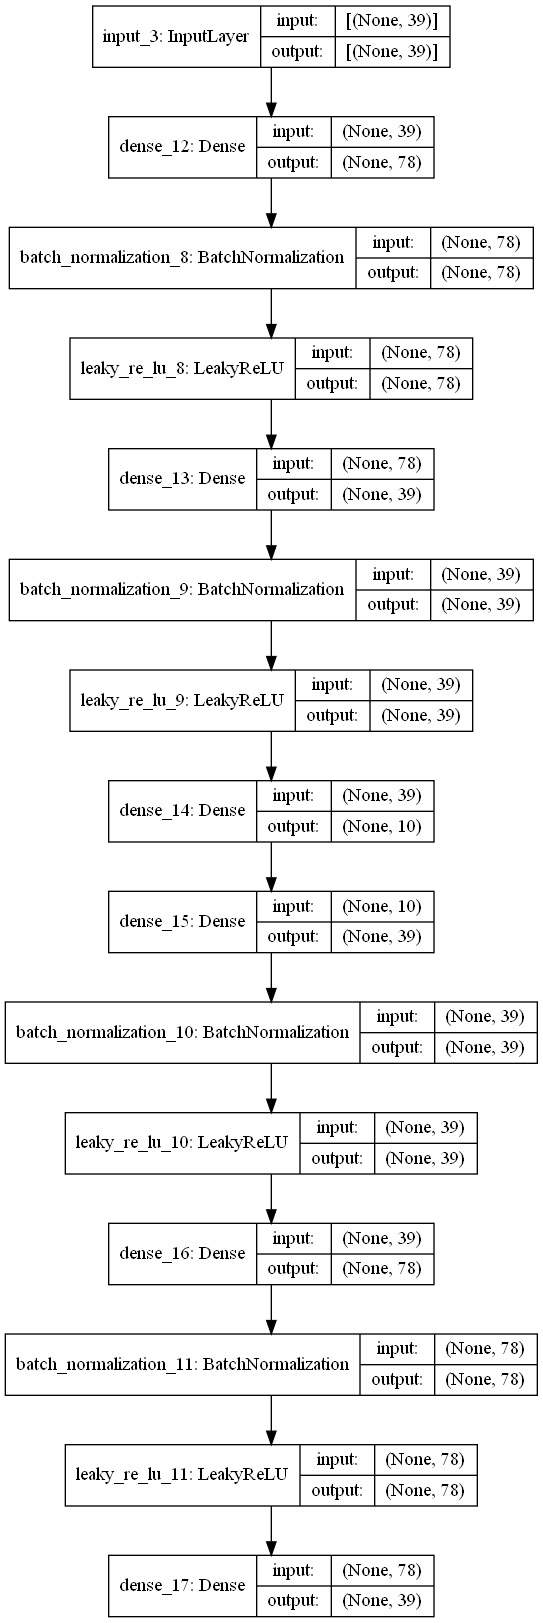

In [208]:
# Reference: https://machinelearningmastery.com/autoencoder-for-classification/
# number of input columns
no_of_inputs = X_train.shape[1]
print('no_of_inputs of AutoEncoder:',no_of_inputs)
# defining autoencoder
input_features = Input(shape=(no_of_inputs,))
# level 1 encoder
ae = Dense(no_of_inputs*2)(input_features)
ae = BatchNormalization()(ae)
ae = LeakyReLU()(ae)
# level 2 encoder
ae = Dense(no_of_inputs)(ae)
ae = BatchNormalization()(ae)
ae = LeakyReLU()(ae)
# bottleneck features
bottleneck_features = 10
bottleneck_features = Dense(bottleneck_features)(ae)
# level 1 decoder
de = Dense(no_of_inputs)(bottleneck_features)
de = BatchNormalization()(de)
de = LeakyReLU()(de)
# level 2 decoder
de = Dense(no_of_inputs*2)(de)
de = BatchNormalization()(de)
de = LeakyReLU()(de)
# output layer
output_features = Dense(no_of_inputs, activation='linear')(de)
# defining autoencoder model
model = Model(inputs=input_features, outputs=output_features)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, base_dir+'/autoencoder.png', show_shapes=True)

**Fitting the model:**

NOTE : The autoencoder is being trained to reconstruct the input – that is the whole idea of the autoencoder

Epoch 1/30
1956/1956 - 9s - loss: 0.0293 - val_loss: 0.0083
Epoch 2/30
1956/1956 - 4s - loss: 0.0127 - val_loss: 0.0053
Epoch 3/30
1956/1956 - 4s - loss: 0.0102 - val_loss: 0.0045
Epoch 4/30
1956/1956 - 3s - loss: 0.0088 - val_loss: 0.0047
Epoch 5/30
1956/1956 - 3s - loss: 0.0077 - val_loss: 0.0038
Epoch 6/30
1956/1956 - 3s - loss: 0.0071 - val_loss: 0.0029
Epoch 7/30
1956/1956 - 3s - loss: 0.0065 - val_loss: 0.0030
Epoch 8/30
1956/1956 - 3s - loss: 0.0063 - val_loss: 0.0034
Epoch 9/30
1956/1956 - 3s - loss: 0.0058 - val_loss: 0.0039
Epoch 10/30
1956/1956 - 3s - loss: 0.0056 - val_loss: 0.0030
Epoch 11/30
1956/1956 - 3s - loss: 0.0054 - val_loss: 0.0023
Epoch 12/30
1956/1956 - 3s - loss: 0.0051 - val_loss: 0.0027
Epoch 13/30
1956/1956 - 3s - loss: 0.0049 - val_loss: 0.0031
Epoch 14/30
1956/1956 - 3s - loss: 0.0048 - val_loss: 0.0022
Epoch 15/30
1956/1956 - 3s - loss: 0.0046 - val_loss: 0.0024
Epoch 16/30
1956/1956 - 3s - loss: 0.0045 - val_loss: 0.0023
Epoch 17/30
1956/1956 - 3s - loss

Text(0.5, 1.0, 'Loss plot of auto Encoder')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'loss')

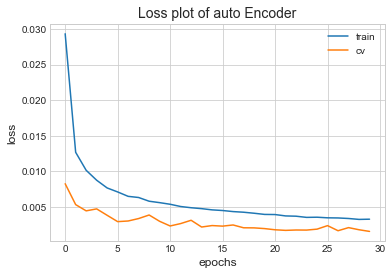

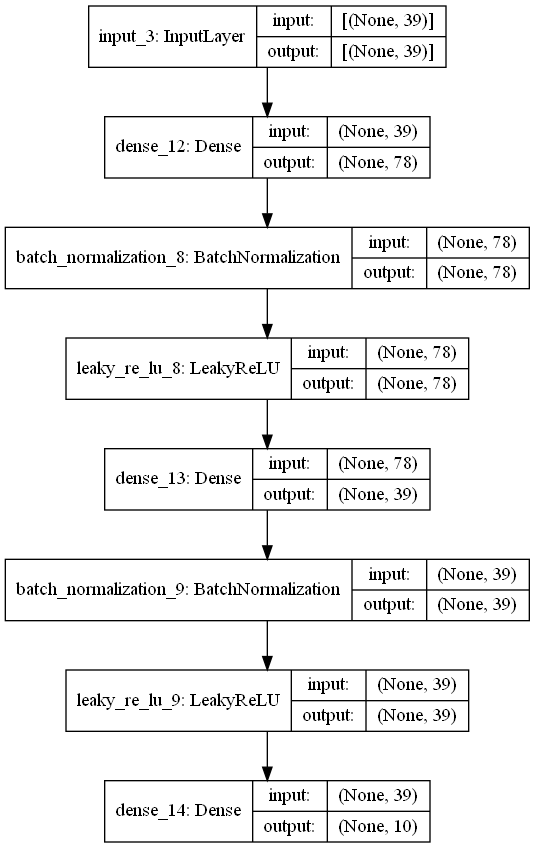

In [209]:
if not os.path.isfile(base_dir+'/encoder.h5'):
    # fit the autoencoder model to reconstruct input
    history = model.fit(X_train, X_train, epochs=30, batch_size=16, verbose=2, validation_data=(X_cv,X_cv))
    # plot loss
    plt.title("Loss plot of auto Encoder",fontsize=14)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='cv')
    plt.xlabel("epochs",fontsize=12)
    plt.ylabel("loss",fontsize=12)
    plt.legend()
    plt.show()
    # define an encoder model (without the decoder)
    encoder = Model(inputs=input_features, outputs=bottleneck_features)
    plot_model(encoder, base_dir+'/encoder_no_compress.png', show_shapes=True)
    # save the encoder to file
    encoder.save(base_dir+'/encoder.h5')
    # load the model from file
    encoder_features = load_model(base_dir+'/encoder.h5',compile=False)
else:
    # load the model from file
    encoder_features = load_model(base_dir+'/encoder.h5',compile=False)

Finally, we can save the encoder model for use later, if desired.

array([[1.        , 1.        , 0.        , ..., 0.95959596, 0.26153846,
        0.3030303 ],
       [0.        , 1.        , 0.        , ..., 0.92929293, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.01010101, 0.50769231,
        0.51515152],
       ...,
       [1.        , 1.        , 0.        , ..., 0.09090909, 0.4       ,
        0.43939394],
       [0.        , 1.        , 0.        , ..., 0.8989899 , 0.15384615,
        0.78787879],
       [0.        , 1.        , 0.        , ..., 0.92929293, 0.58461538,
        0.59090909]])

In [210]:
# encodeing the train data
X_train_encode = encoder_features.predict(X_train)
# encoding the CV data
X_cv_encode = encoder_features.predict(X_cv)
# encoding the Test data
X_test_encode = encoder_features.predict(X_test)

array([[-1.5318272, -0.674344 , -1.5344967, -1.1771324,  3.9494777,
         1.2491243, -1.7633368,  1.343681 , -1.3712384,  0.6491454]],
      dtype=float32)

In [227]:
print("shape of AutoEncoder X_train:",X_train_encode.shape)
print("shape of AutoEncoder X_cv:",X_cv_encode.shape)
print("shape of AutoEncoder X_test:",X_test_encode.shape)

shape of AutoEncoder X_train: (31292, 10)
shape of AutoEncoder X_cv: (9779, 10)
shape of AutoEncoder X_test: (7823, 10)


In [228]:
ae_columns=["AE_1", "AE_2", "AE_3","AE_4", "AE_5", "AE_6","AE_7", "AE_8", "AE_9","AE_10"]
X_train_ae=pd.DataFrame(X_train_encode,columns=ae_columns)
X_cv_ae=pd.DataFrame(X_cv_encode,columns=ae_columns)
X_test_ae=pd.DataFrame(X_test_encode,columns=ae_columns)

,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10
0,-1.303342,1.448864,0.517987,-2.144528,-0.803319,-1.460601,0.841109,-3.009906,1.287319,-1.797206
1,-3.861582,0.981628,-1.598419,2.984540,1.969583,0.288092,-1.084615,1.649822,2.155205,0.205949
2,-2.866493,-1.837443,3.237174,0.332647,-0.375614,-0.524374,1.964997,-1.451765,-0.821126,0.432560
3,-1.225628,-0.821206,2.726202,-3.123645,-0.901083,-3.278983,0.526822,1.695873,1.201209,-3.339123
4,-1.214693,-0.963821,-1.599371,-1.203987,4.184718,1.614606,-1.666561,1.073000,-0.905514,0.528191
...,...,...,...,...,...,...,...,...,...,...
31287,-2.292244,0.567409,-2.288503,-1.899320,4.605205,0.245264,-0.912423,-0.307281,-0.833629,0.993833
31288,-4.416147,3.283385,-1.224626,2.486967,2.726238,-1.445352,-1.100386,0.982373,2.252613,2.025655
31289,-0.811016,2.788966,-0.933924,-2.124598,4.961727,1.151242,-0.438361,0.636017,-1.702673,-0.648230
31290,-0.189746,1.652258,-1.323514,-2.181847,1.778860,2.019140,-0.951438,1.554840,-1.168649,0.125031


In [235]:
np.hstack([X_train,X_train_ae]).shape

(31292, 49)

In [236]:
# X_train.index = X_train_ae.index
X_train = np.hstack([X_train, X_train_ae])
# X_cv.index = X_cv_ae.index
X_cv = np.hstack([X_cv, X_cv_ae])
# X_test.index = X_test_ae.index
X_test = np.hstack([X_test, X_test_ae])

In [239]:
All_columns.extend(ae_columns)

## 6. Model Taining on SET 2 data

### 6.1 LGBM Model with Hyper Parameterization (for log loss metric)

In [240]:
%%time
model=LGBMClassifier(class_weight="balanced")

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    "reg_lambda":[0.001,0.01]
}
clf=RandomizedSearchCV(estimator=model,param_distributions=params,verbose=10,n_jobs=3,return_train_score=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  7.4min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  8.4min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  8.6min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Wall time: 9min 1s


RandomizedSearchCV(estimator=LGBMClassifier(class_weight='balanced'), n_jobs=3,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'objective': 'multiclass',
                                        'reg_lambda': [0.001, 0.01],
                                        'subsample': [0.5, 0.7, 0.9, 1]},
                   return_train_score=True, verbose=10)

In [31]:
print("Best score after hyper parameter Tunning of LGBMClassifier ::",clf.best_score_)

Best score after hyper parameter Tunning of LGBMClassifier :: 0.6787041591396341


LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
               learning_rate=0.15, max_depth=10, n_estimators=1000,
               objective='u', reg_lambda=0.01, subsample=0.7)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


CalibratedClassifierCV(base_estimator=LGBMClassifier(class_weight='balanced',
                                                     colsample_bytree=0.7,
                                                     learning_rate=0.15,
                                                     max_depth=10,
                                                     n_estimators=1000,
                                                     objective='u',
                                                     reg_lambda=0.01,
                                                     subsample=0.7))

Log Loss with LGBMClassifier:: 0.807046759602102
Number of misclassified points  30.39754569858111
-------------------- Confusion matrix --------------------


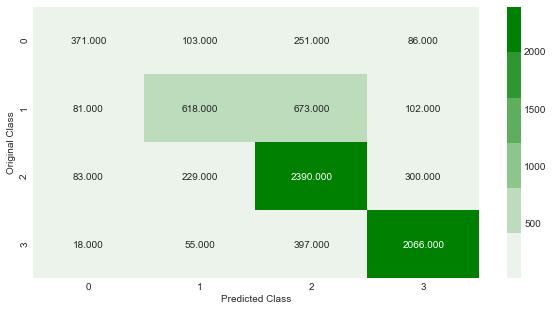

-------------------- Precision matrix --------------------


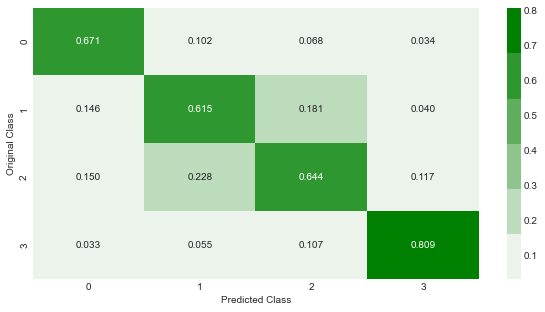

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


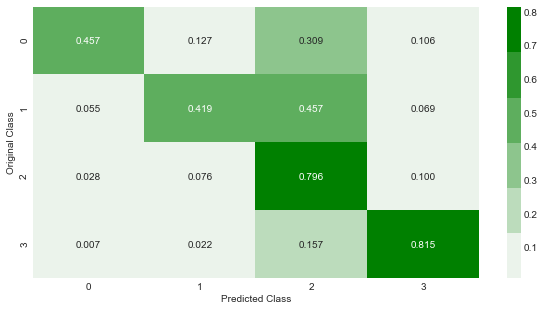

Sum of rows in precision matrix [1. 1. 1. 1.]


In [32]:
#Train Random Forest with Best param
best_param=clf.best_params_
#********** Train model with Best Hyper parameter********

model=LGBMClassifier(learning_rate=best_param["learning_rate"],
                     n_estimators=best_param["n_estimators"],
                     max_depth=best_param["max_depth"],
                     colsample_bytree=best_param["colsample_bytree"],
                     subsample=best_param["subsample"],
                     objective=best_param["objective"],
                     class_weight="balanced",reg_lambda=best_param["reg_lambda"]
                        )
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)

#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("Log Loss with LGBMClassifier:: {}".format(log_loss(y_test,predict_y)))

y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Top 25 Important + 10 Autoencoder","LGBMClassifier","Log loss",round(log_loss(y_train,clf.predict_proba(X_train)),3),
               round(log_loss(y_cv,clf.predict_proba(X_cv)),3),round(log_loss(y_test,clf.predict_proba(X_test)),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


### 6.2 Random Forest Classifier( With Log Loss)

In [33]:
%%time
model=RandomForestClassifier(class_weight="balanced",min_samples_split=2)
params={
 'n_estimators':[100,200,500,1000,2000],
 'max_depth':[3,5,10],
 
}
clf=RandomizedSearchCV(estimator=model,param_distributions=params,verbose=10,scoring="neg_log_loss",n_jobs=3,return_train_score=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   16.8s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   30.7s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   57.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  3.2min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  4.1min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.9min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  9.5min finished


Wall time: 11min 36s


RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=3,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000]},
                   return_train_score=True, scoring='neg_log_loss', verbose=10)

In [34]:
results=pd.DataFrame(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.767267,0.048788,0.257820,0.014723,200,10,"{'n_estimators': 200, 'max_depth': 10}",-0.985941,-0.976753,-0.981714,...,-0.977201,0.006618,2,-0.834389,-0.831936,-0.833870,-0.834511,-0.834416,-0.833824,0.000971
1,3.490432,0.040476,0.078440,0.006692,100,5,"{'n_estimators': 100, 'max_depth': 5}",-1.063336,-1.057455,-1.061568,...,-1.057570,0.005052,7,-1.044036,-1.047248,-1.045564,-1.051488,-1.045073,-1.046682,0.002617
2,22.848725,0.745877,0.593489,0.013559,1000,3,"{'n_estimators': 1000, 'max_depth': 3}",-1.110230,-1.100796,-1.105178,...,-1.103473,0.004593,9,-1.098777,-1.099727,-1.097690,-1.106067,-1.099405,-1.100333,0.002950
3,17.970702,0.301493,0.362204,0.011775,500,5,"{'n_estimators': 500, 'max_depth': 5}",-1.065342,-1.055699,-1.059610,...,-1.057120,0.005974,6,-1.045836,-1.046312,-1.043534,-1.050173,-1.045690,-1.046309,0.002156
4,4.663012,0.211642,0.126328,0.002718,200,3,"{'n_estimators': 200, 'max_depth': 3}",-1.112091,-1.101656,-1.105161,...,-1.103523,0.006373,10,-1.100764,-1.100812,-1.097092,-1.102634,-1.100905,-1.100441,0.001816


In [35]:
print("Best score ::",clf.best_score_)

Best score :: -0.9760486002662712


In [36]:
train_auc_df = results.pivot("param_n_estimators", "param_max_depth", "mean_train_score")
cv_auc_df=results.pivot("param_n_estimators", "param_max_depth", "mean_test_score")

<AxesSubplot:xlabel='param_max_depth', ylabel='param_n_estimators'>

Text(0.5, 1.0, 'AUC heatmap for training data')

Text(0.5, 19.5, 'n_estimators')

Text(37.5, 0.5, 'learning_rate')

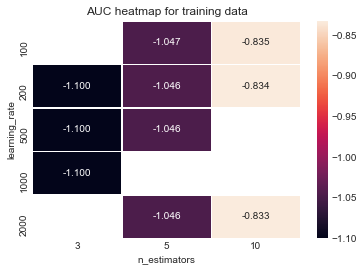

In [37]:

sns.heatmap(train_auc_df,annot=True,linewidths=.5,fmt='.3f')
plt.title("AUC heatmap for training data")
plt.xlabel("n_estimators")
plt.ylabel("learning_rate")
plt.show()


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=2000)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                             max_depth=10,
                                                             n_estimators=2000))

Log Loss with RF Model:: 0.9175824060661043
Number of misclassified points  37.70931867569986
-------------------- Confusion matrix --------------------


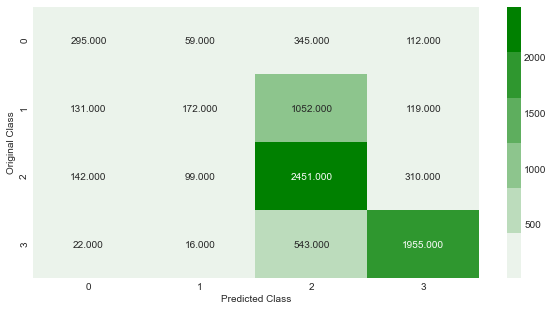

-------------------- Precision matrix --------------------


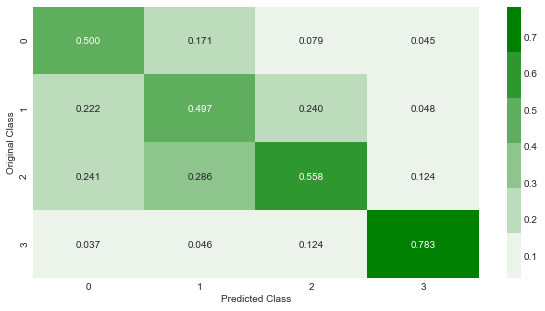

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


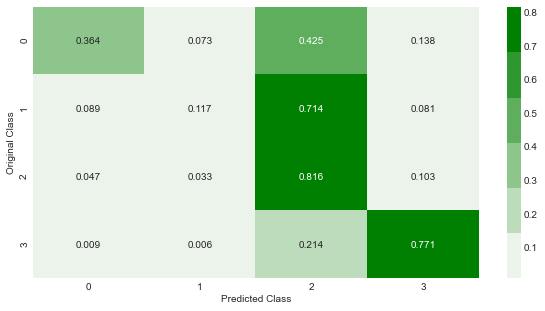

Sum of rows in precision matrix [1. 1. 1. 1.]


In [38]:
#Train Random Forest with Best param
best_param=clf.best_params_
#********** Train model with Best Hyper parameter********

model=RandomForestClassifier(n_estimators=best_param["n_estimators"],class_weight="balanced",min_samples_split=2,
                             max_depth=best_param["max_depth"],
                        )
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)

#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("Log Loss with RF Model:: {}".format(log_loss(y_test,predict_y)))

y_pred=np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test,y_pred)
C=confusion_matrix(y_test,y_pred)
summary.append(["Top 25 Important + 10 Autoencoder","Random Forest","Log loss",round(log_loss(y_train,clf.predict_proba(X_train)),3),
               round(log_loss(y_cv,clf.predict_proba(X_cv)),3),round(log_loss(y_test,clf.predict_proba(X_test)),3),round((len(y_test)-np.trace(C))/len(y_test)*100,3)])


# 7. FINAL SUMMARY

In [39]:
summary_df=pd.DataFrame(summary,columns=table_columns)
print(summary_df.to_markdown())

|    | Feature_set                       | Model          | Evaluation_matrix   |   train_loss |   CV_loss |   Test_loss |   Mis-classified |
|---:|:----------------------------------|:---------------|:--------------------|-------------:|----------:|------------:|-----------------:|
|  0 | Top 25 Important + 10 Autoencoder | LGBMClassifier | Log loss            |        0.301 |     0.81  |       0.807 |           30.398 |
|  1 | Top 25 Important + 10 Autoencoder | Random Forest  | Log loss            |        0.766 |     0.927 |       0.918 |           37.709 |


# 8. CONCLUSION

## BEST MODEL: LGBM (WITH LOG LOSS)  with basic data

**1. We know that Class 3 and Class 4 constitute 70% of data.**

**2. From the Confusion matrix we see that**

- For the original class 3, 3012 point were correctly predicted as class 3, 397 as class 4, 262 as class 2, 70 as class 1
  
- For the original class 4, 2579 point were correctly predicted as class 4, 512 as class 3, 57 as class 2, 18 as class 1

- Lets also see ratios for which we have built 2 other matrices

**3. From Precision Matrix we see that**

- Here we are normalizing column matrix to 1 , that is precision matrix (column sum=1)

- Precision for Class 1 : 72.5%, Precision for Class 2 : 62.6%, Precision for Class 3 : 64.6%, Precision for Class 4 : 80%

- If you take the 1st column, 2nd row element which is 0.132 which 13.2%, this shows that even though it is predicted to be class 1, it actually belongs to class 2.

- Similarly if you take 2nd column, 3rd row element which is 0.211, 21.1%, this shows that 21.1% which actually belong to class 3 are predicted to be class 2.

**4. From Recall Matrix see see that.**

- Here are normalizing row matrix to 1 , that is Recall matrix (Row sum =1 )

- Recall means, how well my model is able to recall the actual class label.

- Of all the points that originally belong to class 1 only 44.6% of points were actually predicted as class 1, 14.5% of points were predicted as class 2, etc.

- Lets take off diagonal elements for class 3
- Lets take 3rd column, 2nd row, which is 0.45 which is 45%, which states that of all the points belonging to class 2, 45% of points were predicted to be class 3 , 8.1% of points were declared by model as class 4, 4.4% of points were declared by model as class 1.


In [99]:
%%time
model=LGBMClassifier(class_weight="balanced",num_leaves=50)

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    "reg_lambda":[0.001,0.01]
}
clf=RandomizedSearchCV(estimator=model,param_distributions=params,verbose=10,n_jobs=3,return_train_score=True)
clf.fit(X_train,y_train)
#Train Random Forest with Best param
best_param=clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   29.8s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  7.7min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  8.3min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  9.9min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 10.2min finished


Wall time: 10min 39s


In [100]:

#********** Train model with Best Hyper parameter********

model=LGBMClassifier(learning_rate=best_param["learning_rate"],
                     n_estimators=best_param["n_estimators"],
                     max_depth=best_param["max_depth"],
                     colsample_bytree=best_param["colsample_bytree"],
                     subsample=best_param["subsample"],
                     objective=best_param["objective"],
                     class_weight="balanced",reg_lambda=best_param["reg_lambda"],num_leaves=50
                        )
model.fit(X_train,y_train)
clf=CalibratedClassifierCV(base_estimator=model)
clf.fit(X_train,y_train)

#************ Model Evalution on Test Data********
predict_y=clf.predict_proba(X_test)
print("Log Loss with  LGBMClassifier on Test data:: {}".format(log_loss(y_test,predict_y)))
predict_y=clf.predict_proba(X_cv)
print("Log Loss with LGBMClassifier on CV data:: {}".format(log_loss(y_cv,predict_y)))
predict_y=clf.predict_proba(X_train)
print("Log Loss with LGBMClassifier on Train data:: {}".format(log_loss(y_train,predict_y)))

LGBMClassifier(class_weight='balanced', colsample_bytree=0.5, max_depth=10,
               n_estimators=2000, num_leaves=50, objective='l', reg_lambda=0.01,
               subsample=1)

CalibratedClassifierCV(base_estimator=LGBMClassifier(class_weight='balanced',
                                                     colsample_bytree=0.5,
                                                     max_depth=10,
                                                     n_estimators=2000,
                                                     num_leaves=50,
                                                     objective='l',
                                                     reg_lambda=0.01,
                                                     subsample=1))

Log Loss with  LGBMClassifier on Test data:: 0.8131579088373355
Log Loss with LGBMClassifier on CV data:: 0.8167207781865267
Log Loss with LGBMClassifier on Train data:: 0.3145073452602354


In [101]:
predict_y=clf.predict_proba(X_test)
predict_y=np.argmax(predict_y,axis=1)
confusion_matrix(y_test,predict_y)

array([[ 377,  111,  239,   84],
       [  82,  618,  655,  119],
       [  82,  205, 2389,  326],
       [  11,   56,  405, 2064]], dtype=int64)

Number of misclassified points  30.3591972389109
-------------------- Confusion matrix --------------------


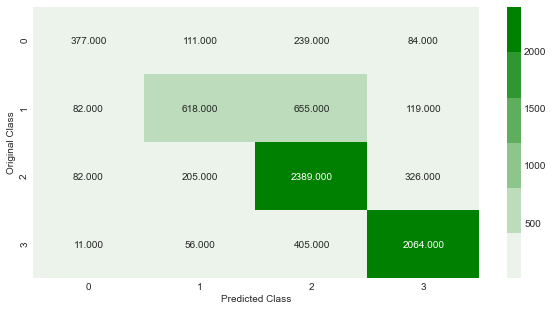

-------------------- Precision matrix --------------------


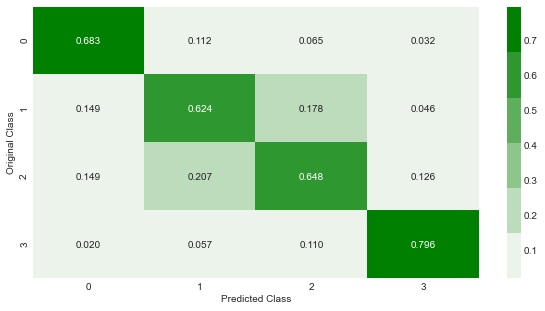

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------- Recall matrix --------------------


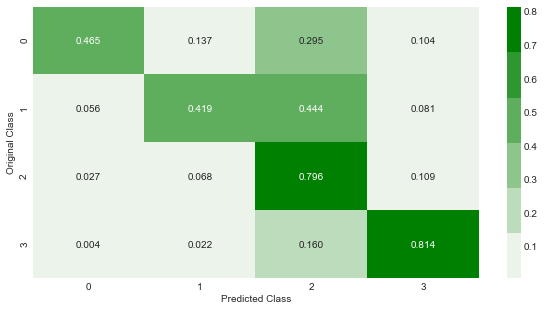

Sum of rows in precision matrix [1. 1. 1. 1.]


In [102]:
plot_confusion_matrix(y_test,predict_y)

In [104]:
# save the model to disk

filename = base_dir+'/lgb_model.pkl'

if not os.path.isfile(filename):
    joblib.dump(clf, filename)
else:
    clf=pickle.load(filename)

['E:\\WorkStation\\Predict Physician and Drug\\data/lgb_model.pkl']

In [105]:
pred_y=clf.predict(X_test)
confusion_matrix(y_test,pred_y)


array([[ 377,  111,  239,   84],
       [  82,  618,  655,  119],
       [  82,  205, 2389,  326],
       [  11,   56,  405, 2064]], dtype=int64)

In [108]:
f1_score(y_test,pred_y,average="macro")

0.643462603868727

# 9. Future enhancements and References
* For further improvements, we can collect more data and train much better models.
* Upon getting more data, we could use advanced deep learning techniques to enhance the model performance even better.
* Can improve the Log Loss and Latency time for response.

## REFERENCES:
* www.appliedaicourse.com
* https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
* https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1
* https://machinelearningmastery.com/autoencoder-for-classification/
* www.stackoverflow.com